
Project: RFM Customer Segmentation with K-Means

Dataset: rfm_segment.csv (tính từ dữ liệu Olist)

Goal:

    - Phân khúc khách hàng dựa trên Recency, Frequency, Monetary

    - Ứng dụng KMeans clustering

    - Gán tên nhóm khách hàng theo mô hình RFM
    



# Import and Load file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload()



In [ ]:
rfm_segment = pd.read_csv('rfm_segment.csv')
rfm_segment



,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42
93353,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
93354,ffff371b4d645b6ecea244b27531430a,568,1,112.46
93355,ffff5962728ec6157033ef9805bacc48,119,1,133.69


# Xây dựng mô hình

## Chuẩn hóa

In [ ]:
X = rfm_segment[['recency', 'frequency', 'monetary']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Chọn k tối ưu

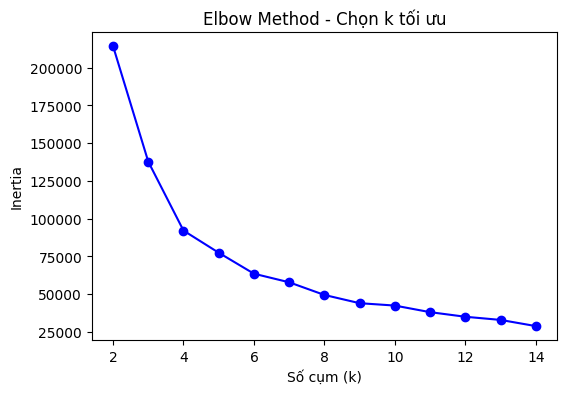

In [ ]:
inertia = []

K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method - Chọn k tối ưu')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=42)
rfm_segment['cluster'] = kmeans.fit_predict(X_scaled)

# Phân nhóm khách hàng RFM

## Biểu đồ

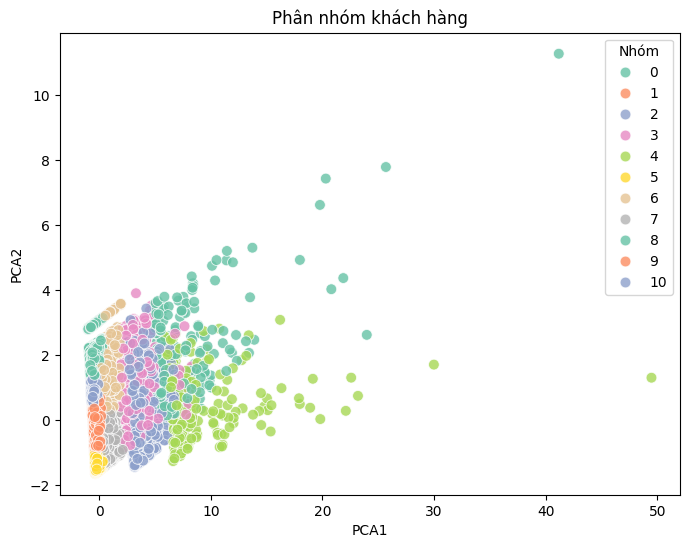

In [ ]:
from sklearn.decomposition import PCA

# Giảm từ 3 chiều (R, F, M) xuống 2 chiều
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Tạo bản copy để gắn PCA
rfm_pca = rfm_segment.copy()
rfm_pca['PCA1'] = pca_components[:, 0]
rfm_pca['PCA2'] = pca_components[:, 1]

# Vẽ biểu đồ scatter
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm_pca,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Phân nhóm khách hàng', fontsize=12)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Nhóm')
plt.show()


## Chỉ số RFM trung bình của từng nhóm

In [ ]:
rfm_summary = rfm_segment.groupby('cluster')[['recency','frequency','monetary']].mean().round(1).sort_values(by='monetary', ascending=False)
print("Tổng quan các nhóm khách hàng:")
print(rfm_summary)

Tổng quan các nhóm khách hàng:
         recency  frequency  monetary
cluster                              
8          231.1        1.0    2616.7
3          222.9        1.0    1150.6
4          202.6        3.4     488.5
6          373.4        1.0     481.3
7          124.0        1.0     415.0
2          221.5        2.0     271.9
0          514.7        1.0     117.1
9          264.3        1.0     112.9
5           48.0        1.0     108.9
10         384.5        1.0     105.6
1          155.2        1.0     104.4


## Gán tên các nhóm khách hàng

In [ ]:
# Tạo mapping giữa cluster và tên nhóm
segment_map = {
    8: 'Champions',
    3: "Can't Lose Them",
    4: 'Loyal Customers',
    6: 'Customers Needing Attention',
    7: 'Promising',
    2: 'Potential Loyalist',
    0: 'Lost',
    9: 'At Risk',
    5: 'Recent Customers',
    10: 'Hibernating',
    1: 'About to Sleep'
}

rfm_segment['segment'] = rfm_segment['cluster'].map(segment_map)


In [ ]:
rfm_segment

,customer_unique_id,recency,frequency,monetary,cluster,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,About to Sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,About to Sleep
2,0000f46a3911fa3c0805444483337064,537,1,86.22,0,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,9,At Risk
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,9,At Risk
...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,8,Champions
93353,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,9,At Risk
93354,ffff371b4d645b6ecea244b27531430a,568,1,112.46,0,Lost
93355,ffff5962728ec6157033ef9805bacc48,119,1,133.69,1,About to Sleep


# Save file

In [ ]:
rfm_segment.to_csv("rfm_segment_kmeans.csv")